## CIS-550 Advanced Machine Learning 

Importing necessary files and packages. 

In [2]:

import numpy as np
import pandas as pd
import warnings
import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Evaluation and visualisation

Importing the dataset from the local desktop. 

In [3]:
# import datasets
file_path = r'C:\Users\swath\Downloads\AML\Project\project\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Determining the shape of the data set. The dataset has 7043 rows and 21 columns. 

In [4]:
df.shape

(7043, 21)

Displaying the columns. 

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Displaying the datatypes. 

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Displaying descriptive statistics for the numerical columns. 

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see above that the columns '*SeniorCitizen*', '*tenure*', '*MonthlyCharges*' and '*TotalCharges*' are the only numerical columns. However, the *TotalCharges* column's data type is object. As a result we need to change it's datatype from object to float. 

Also, the column *customerID* has no such significance in our analysis hence we decide to drop it. 

In [9]:
df1 = df.copy()
df1 = df1.drop(columns=['customerID'])
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

We can see the changes clearly that the *TotalCharges* is now a float datatype column and *customerID* is no longer a feature in the dataset. 

In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Checking for null values if any. There were 11 missing values in *TotalCharges*.

In [11]:
df1.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Displaying all the rows with null values. 

In [12]:
df1[df1['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since there are only 11 rows, we will just imputate the null values with 0.

In [14]:
df1['TotalCharges'].fillna(0, inplace=True)

We can see the count of *TotalCharges* go up to 7043 from 7032.

In [15]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Here, we check again whether if the missing values are there or not. 

There are no missing values. 

In [17]:
df1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Using a boxplot, we check for Outliers if any. 
We can see there are no outliers. 

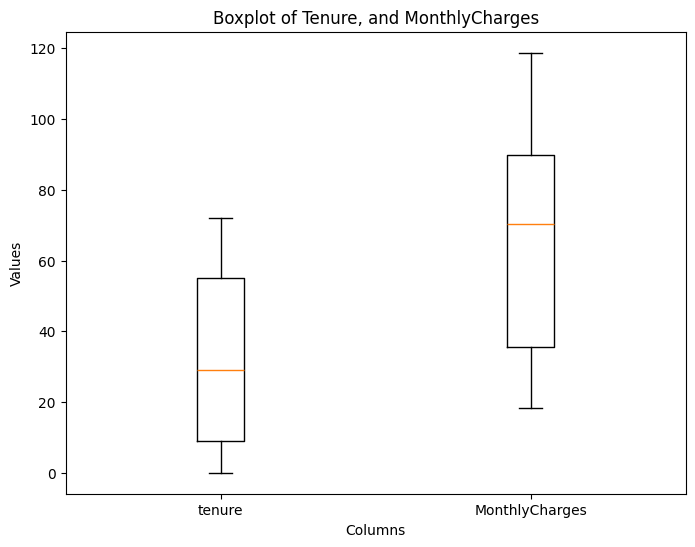

In [18]:
plt.figure(figsize=(8, 6))
plt.boxplot([ df1['tenure'], df1['MonthlyCharges']], labels=['tenure', 'MonthlyCharges'])
plt.title('Boxplot of Tenure, and MonthlyCharges')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [19]:
print(df1.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


## Exploratory Data Analysis

Generating a series of countplots to visualize the relationship between selected categorical variables and the churn status of customers.

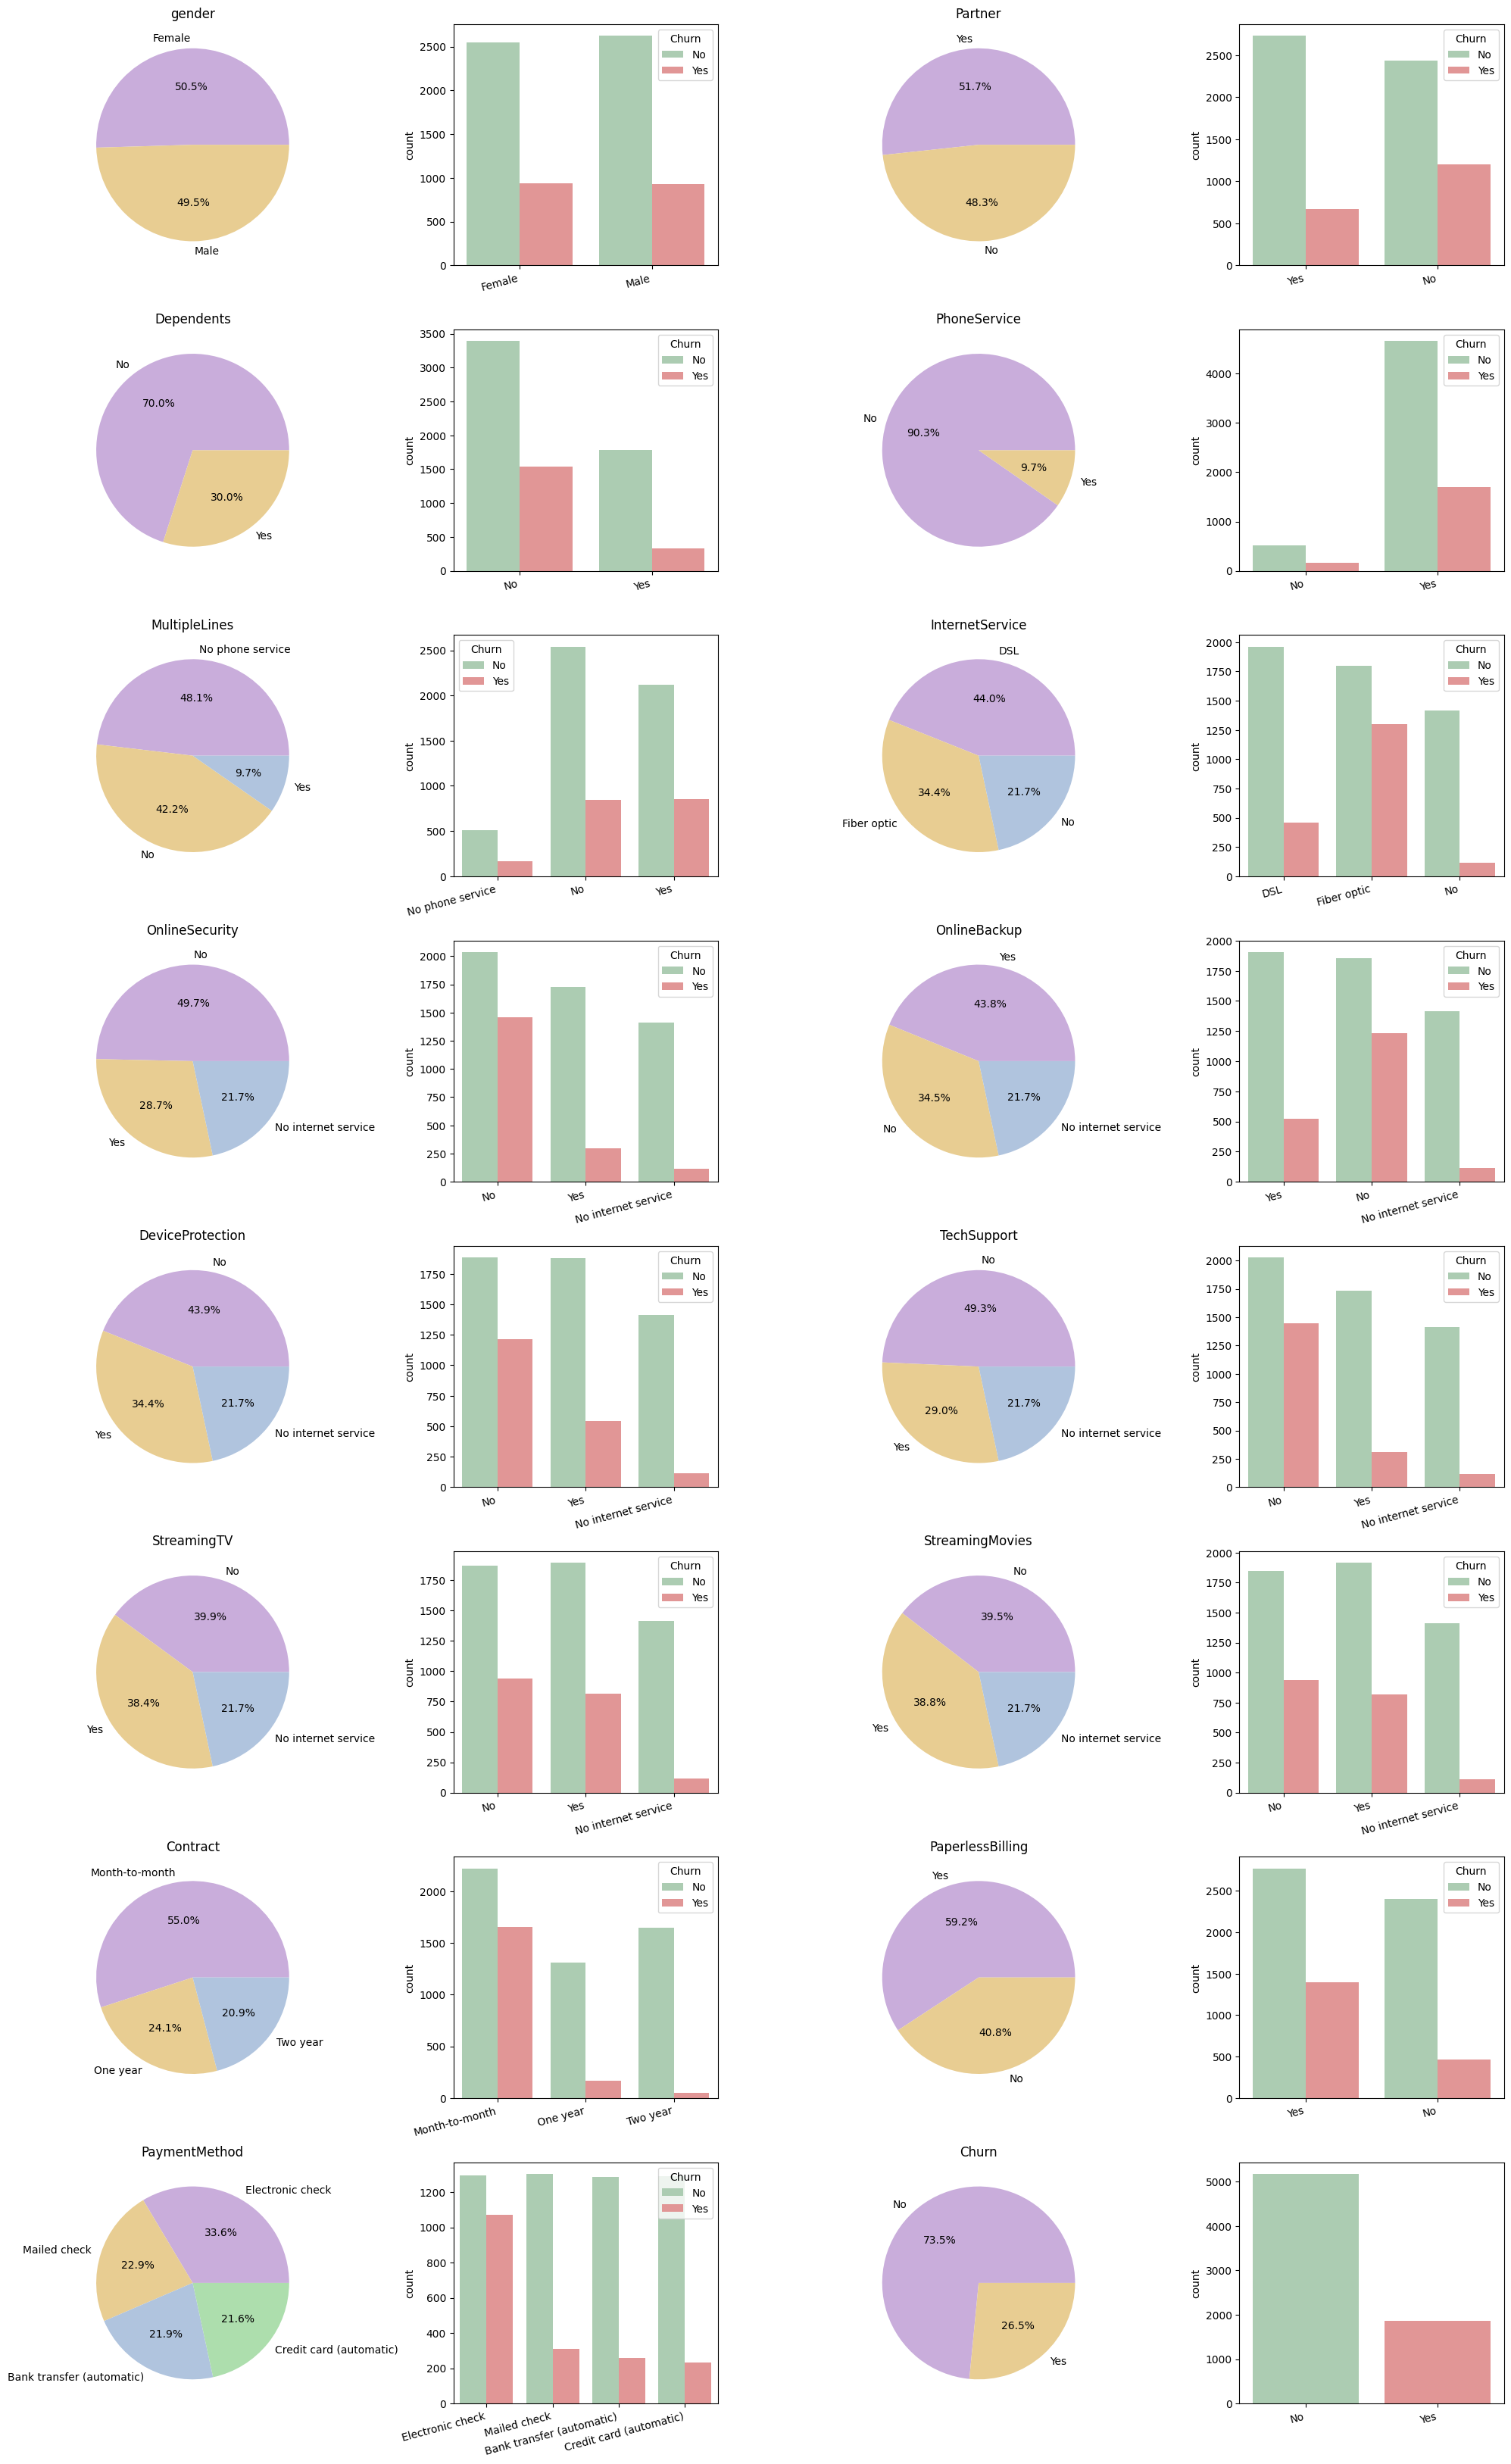

In [20]:
plt.figure(figsize=(20, 40))
exclude_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']
other_cols = [col for col in df1.columns if col not in exclude_cols]

for i, col in enumerate(other_cols):
    plt.subplot(10, 4, i*2+1)
    
    plt.title(col)
    plt.pie(df1[col].value_counts(),
            autopct='%1.1f%%', labels=df1[col].unique(),
            colors=['#c9addb', '#e8cd92', '#B0C4DE', '#addead'])
    
    plt.subplot(10, 4, i*2+2)
    sns.countplot(data=df1,
                  x=col,
                  hue='Churn',
                  palette=['#a7d1ae', '#ed8a8a'])
    plt.xticks(rotation=15, ha='right')
    plt.xlabel('')

plt.tight_layout()
plt.show()

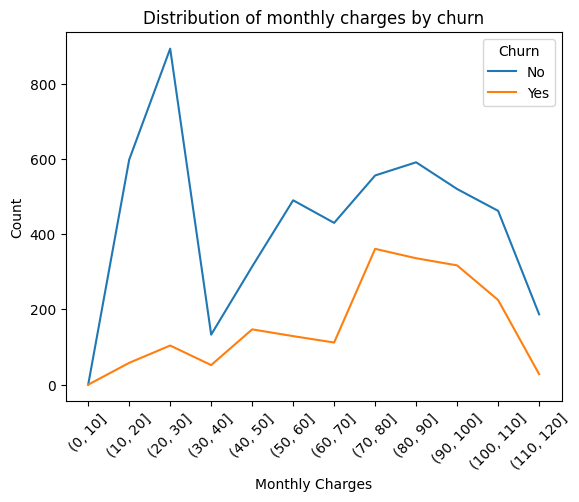

In [21]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

df2=df1.copy()

bin_width = 10
bins = range(0, int(df2['MonthlyCharges'].max()) + bin_width, bin_width)
df2['MonthlyChargesBin'] = pd.cut(df2['MonthlyCharges'], bins)
count_data = df2.groupby(['MonthlyChargesBin', 'Churn']).size().reset_index(name='count')

count_data['MonthlyChargesBin'] = count_data['MonthlyChargesBin'].astype(str)

ax = sns.lineplot(data=count_data, x='MonthlyChargesBin', y='count', hue='Churn')

ax.set_ylabel('Count')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

plt.xticks(rotation=45)

plt.show()

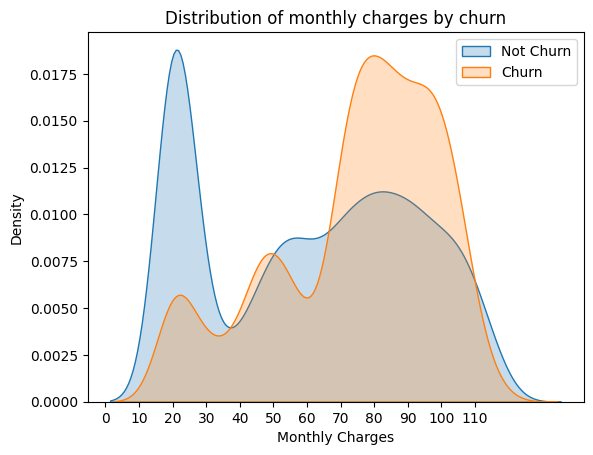

In [22]:
# use kdeplot (Kernel Density Estimation) to display the density distribution of Monthly Charges under different Churn states.

ax = sns.kdeplot(df2.MonthlyCharges[(df["Churn"] == 'No')],
                  shade=True) #color="Red",
ax = sns.kdeplot(df2.MonthlyCharges[(df["Churn"] == 'Yes')],
                 ax=ax,shade=True)#color="Blue"
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.xticks(range(0, 111, 10))
plt.show()

In the frequency distribution of monthly charges, the left figure represents the count, while the right figure represents the density, providing a clearer visualization. The data indicates that the churn rate is notably high for monthly charges between 80 and 100. This range of values appears to have influenced customers to switch providers.
Customers with a monthly charge of 20 are less likely to churn.

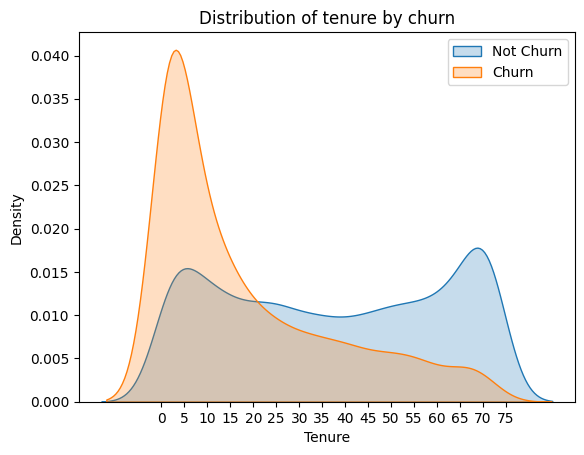

In [23]:
# use kdeplot (Kernel Density Estimation) to display the density distribution of tenure under different Churn states.

ax = sns.kdeplot(df2.tenure[(df["Churn"] == 'No')], shade=True)  # color="Red",
ax = sns.kdeplot(df2.tenure[(df["Churn"] == 'Yes')], ax=ax, shade=True)  # color="Blue"
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of tenure by churn')
plt.xticks(range(0, 76, 5))

plt.show()

For the frequency distribution of tenure against churn, the graph indicates that customers with a tenure of 1 to 5 months are more likely to churn, while those with a tenure of 25 to 70 months are less likely to churn. This shows that customers who have been with the company for a longer period are more loyal and less likely to switch providers while early churn suggests a potential issue with onboarding or initial customer satisfaction, emphasizing the need for targeted strategies to improve retention during this crucial period.

## Feature Encoding


We will convert string categorical values into numbers first.

In [24]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# label encoder categories into numeric
columns_to_exclude = [ 'tenure', 'MonthlyCharges', 'TotalCharges']

columns_to_encode = df1.drop(columns=columns_to_exclude).columns.tolist()

label_encoder = LabelEncoder()
for col in columns_to_encode:
    df1[col] = label_encoder.fit_transform(df1[col])

# convert numbers (0,1,2,3,4) into category
for col in columns_to_encode:
    df1[col] = df1[col].astype('category')

df1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
df1.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

## Feature Scaling 
we scale the numerical data using standarisation technique so that they have a means of 0 and sd as 1

In [27]:
# scale the data
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = df1.select_dtypes(include=['category']).columns.tolist()

scaler = StandardScaler()
 
df1[numeric_columns] = scaler.fit_transform(df1[numeric_columns])

# df1 is ready
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1


## Train Test Split

First we are defining the X and the Y variables of our dataset. 
Here, the target variable Y is the column *Churn* and the rest of the other columns are X. 

We split the data into training and testing sets as X_train, X_test, y_train and y_test. 

x_train and x_test represent the input features used for training and testing a machine learning model, respectively.
y_train and y_test represent the corresponding target labels or output values for the training and testing data, respectively.

In [29]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Churn'], axis=1)
y = df1['Churn']

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Predicting with Logistic Regression


Fitting the training and testing data into the model. 

In [30]:
# Fit the model to the training data
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print('The model score is: ',logreg.score(X_test,y_test))

The model score is:  0.7927608232789212


In [31]:
X_test.shape

(1409, 19)

Extracting a row from the testing set. 

In [32]:
row = X_test.iloc[0:1,0:]
row.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4018,0,0,1,1,-1.033122,1,0,0,2,2,2,0,2,0,1,0,2,0.15582,-0.795314


Passing the row into the model to predict the target value. 

Here the output is an array of the probability values for 0 and 1 binary class respectively. So, the probability for binary class 0 is higher that is 0.67. This means that the customer is likely not to churn looking at the variables given in this particular situation. 

In [33]:
logreg.predict_proba(row)

array([[0.88544869, 0.11455131]])

Confusion Matrix shows the performance of the classification model. 

True Positive - model predicted correctly that people will churn. 

True Negative - model predicted correctly that people will not churn. 

False Positive - model incorrectly predicted that people will churn. 

False Neagtive - model incorrectly predicted that people will not churn. 

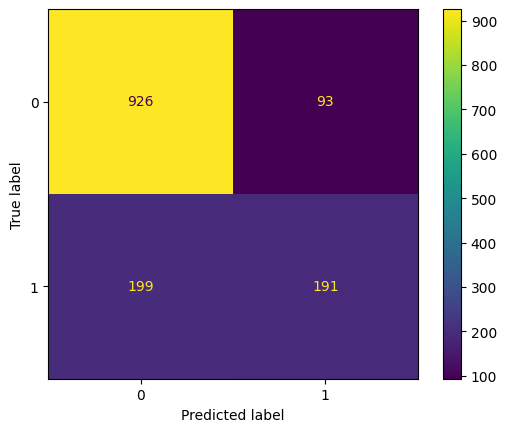

In [34]:
# create the confusion matrix
cm1 = confusion_matrix(y_test, y_pred_log)

ConfusionMatrixDisplay(confusion_matrix=cm1).plot();

Accuracy - measures the proportion of correctly classified instances among the total number of instances. (TP+TN)/(TP+TN+FP+FN).

Recall - measures the proportion of true positive instances that were correctly predicted by the classifier among all actual positive instances. TP/(TP+FN)

Precision - measures the proportion of true positive predictions among the total number of positive predictions made by the classifier. TP / (TP + FP)

F1 score - harmonic mean of precision and recall. IT provides a single score that balances both precision and recall. 2 * (Precision * Recall) / (Precision + Recall)

In [35]:
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

print("Log_Accuracy:", log_accuracy)
print("Log_Recall:", log_recall)
print("Log_Precision:", log_precision)
print("Log_f1:", log_f1)

Log_Accuracy: 0.7927608232789212
Log_Recall: 0.4897435897435897
Log_Precision: 0.6725352112676056
Log_f1: 0.5667655786350149


### Predicting with Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# creating the RandomForest model (hyperparameter temporarily set to: n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rfmodel = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

# training the model
rfresult = rfmodel.fit(X_train, y_train) 

In [37]:
# test the random forest model for the test part
y_pred_rf = rfmodel.predict(X_test)

print('The model score is: ',rfmodel.score(X_test,y_test))

The model score is:  0.7927608232789212


Extracting another row from the X_test dataset. 

In [38]:
row1 = X_test.iloc[1:2,0:]
row1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3017,0,0,1,1,-0.585198,1,0,0,2,2,0,2,0,0,1,1,3,-0.108405,-0.526015


Passing the row into the model to predict the target value. 

Here the output is an array of the probability values for 0 and 1 binary class respectively. So, the probability for binary class 0 is higher that is 0.69. This means that the customer is likely not to churn looking at the variables given in this particular situation. 

In [39]:
rfmodel.predict_proba(row)

array([[0.91045608, 0.08954392]])

TP : 936
FP : 83
FN : 209
TN : 181

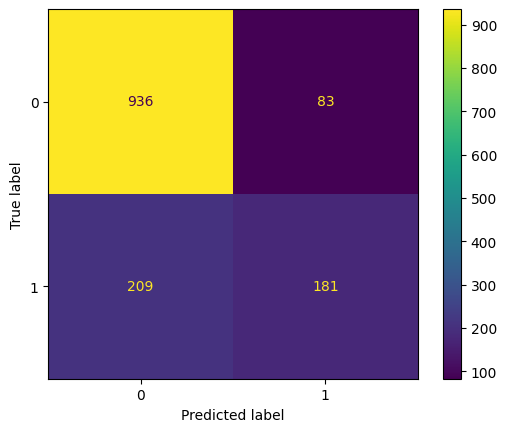

In [40]:
# create the confusion matrix
cm3 = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=cm3).plot();


In [41]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("RF_Accuracy:", rf_accuracy)
print("RF_Recall:", rf_recall)
print("RF_Precision:", rf_precision)
print("RF_f1:", rf_f1)

RF_Accuracy: 0.7927608232789212
RF_Recall: 0.4641025641025641
RF_Precision: 0.6856060606060606
RF_f1: 0.5535168195718654


### Predicting with XG Boost

In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="binary:logistic", random_state=42, enable_categorical=True)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('The model score is: ',xgb.score(X_test,y_test))

The model score is:  0.7877927608232789


In [43]:
row2 = X_test.iloc[2:3,0:]
row2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6894,1,1,1,0,-1.196004,1,2,1,0,2,2,0,2,2,0,1,2,1.36727,-0.858138


Passing the row into the model to predict the target value. 

Here the output is an array of the probability values for 0 and 1 binary class respectively. So, the probability for binary class 1 is higher that is 0.53. This means that the customer is likely to churn looking at the variables given in this particular situation. 

In [44]:
xgb.predict_proba(row2)

array([[0.05818802, 0.941812  ]], dtype=float32)

TP : 909 FP : 110 FN : 189 TN : 201

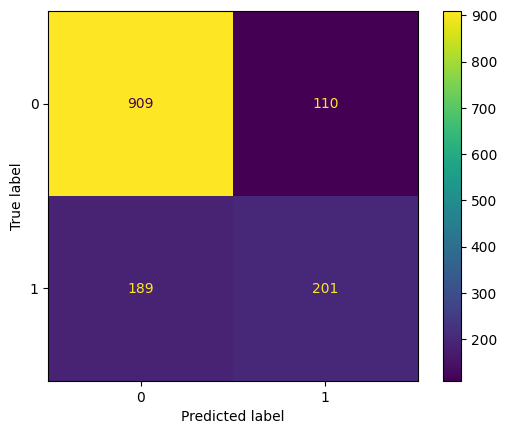

In [45]:
# create the confusion matrix
cm6 = confusion_matrix(y_test, y_pred_xgb)

ConfusionMatrixDisplay(confusion_matrix=cm6).plot();

In [46]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print("xgb_Accuracy:", xgb_accuracy)
print("xgb_Recall:", xgb_recall)
print("xgb_Precision:", xgb_precision)
print("xgb_f1:", xgb_f1)

xgb_Accuracy: 0.7877927608232789
xgb_Recall: 0.5153846153846153
xgb_Precision: 0.6463022508038585
xgb_f1: 0.5734664764621968


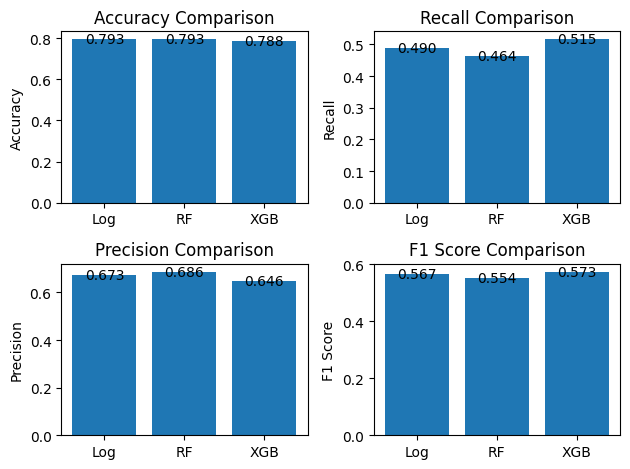

In [47]:
# plot accuracy, recall, precision and f1 comoarisons
models = ['Log', 'RF', 'XGB']
accuracy = [log_accuracy, rf_accuracy, xgb_accuracy]
recall = [log_recall, rf_recall, xgb_recall]
precision = [log_precision, rf_precision, xgb_precision]
f1 = [log_f1, rf_f1, xgb_f1]

#plt.figure(figsize=(10, 6))

# subplot for accuracy, recall, precision, f1
plt.subplot(2, 2, 1)
bars = plt.bar(models, accuracy)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 2)
bars = plt.bar(models, recall)
plt.title('Recall Comparison')
plt.ylabel('Recall')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 3)
bars = plt.bar(models, precision)
plt.title('Precision Comparison')
plt.ylabel('Precision')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 4)
bars = plt.bar(models, f1)
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.tight_layout()
plt.show()

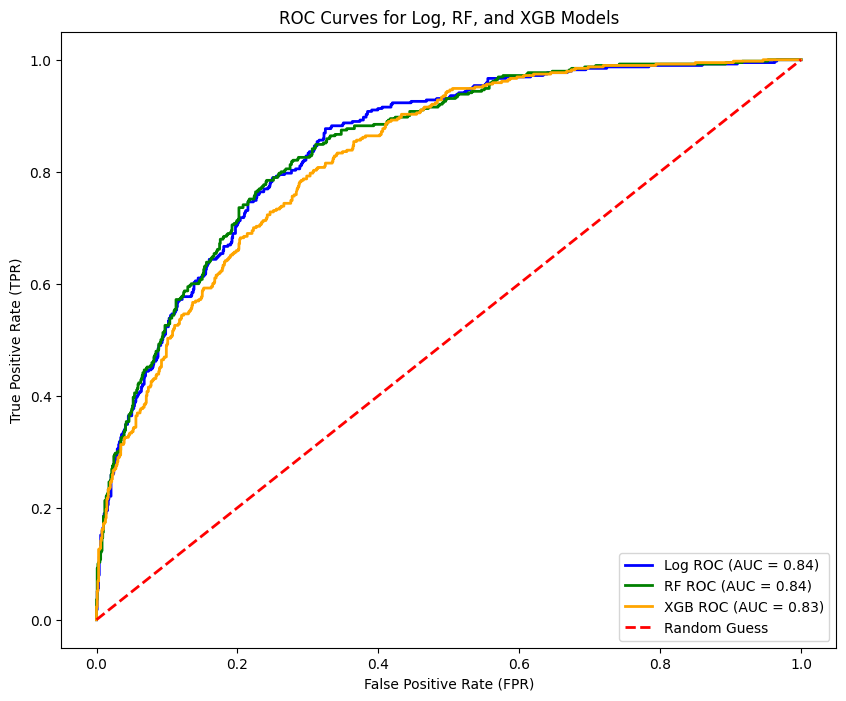

In [48]:
# logistic regression (Log ROC)
y_prob_log = logreg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# rf(RF ROC)
y_prob_rf = rfmodel.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# xgb (XGB ROC)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Log ROC (AUC = %0.2f)' % roc_auc_log)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='RF ROC (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label='XGB ROC (AUC = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Log, RF, and XGB Models')
plt.legend(loc='lower right')
plt.show()

### Hyperparameter Tuning for Logistic Regression

In [49]:
from sklearn.metrics import make_scorer
# list the hyperparameters for tuning
log_parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
                  {'penalty':['none',  'l2']},
                  {'C':[ 0.01, 0.1, 1, 10, 100]},
                  {'max_iter':[100,2000,3000,4000,5000,7000,10000,20000,50000]}]

logistic_rand_search = RandomizedSearchCV(logreg, 
                                          param_distributions=log_parameters,
                                          cv=5,
                                          scoring='f1',
                                          verbose=2,
                                          n_jobs=-1)
logistic_rand_search.fit(X_train, y_train)
print("Best estimator:", logistic_rand_search.best_estimator_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000), n_jobs=-1,
                   param_distributions=[{'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag',
                                                    'saga']},
                                        {'penalty': ['none', 'l2']},
                                        {'C': [0.01, 0.1, 1, 10, 100]},
                                        {'max_iter': [100, 2000, 3000, 4000,
                                                      5000, 7000, 10000, 20000,
                                                      50000]}],
                   scoring='f1', verbose=2)

In [50]:
tuned_log = logistic_rand_search.best_estimator_
# use X_test_scaled to predict
y_pred_log2 = tuned_log.predict(X_test)

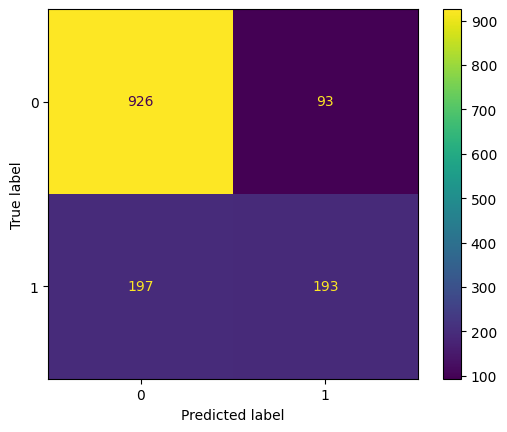

In [51]:
# create the confusion matrix
cm4 = confusion_matrix(y_test, y_pred_log2)

ConfusionMatrixDisplay(confusion_matrix=cm4).plot();

In [52]:
log_tuning_accuracy = accuracy_score(y_test, y_pred_log2)
log_tuning_precision = precision_score(y_test, y_pred_log2)
log_tuning_recall = recall_score(y_test, y_pred_log2)
log_tuning_f1 = f1_score(y_test, y_pred_log2)

print("Log_Accuracy:", log_tuning_accuracy)
print("Log_Recall:", log_tuning_recall)
print("Log_Precision:", log_tuning_precision)
print("Log_f1:", log_tuning_f1)

Log_Accuracy: 0.794180269694819
Log_Recall: 0.4948717948717949
Log_Precision: 0.6748251748251748
Log_f1: 0.5710059171597633


### Hyperparameter Tuning for Random Forest

In [53]:
# set options for the hyperparameters
rf_param_grid = { 
    'n_estimators': [25, 50, 60, 80,100,120,150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [5,7,10,12,15,20,25,None], 
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6, 7]}

In [54]:


start_time = time.time()
rf_rand_search = RandomizedSearchCV(rfmodel, 
                                    param_distributions = rf_param_grid,
                                    cv=5,
                                    scoring='f1',
                                    verbose=2,
                                    n_jobs=-1) 

rf_rand_search.fit(X_train, y_train) 
print("Best estimator:", rf_rand_search.best_estimator_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best estimator: RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=4,
                       n_estimators=150, n_jobs=-1, random_state=42)
Elapsed time (seconds): 15.501003742218018


In [55]:
# use X_test to predict
y_pred_rf2 = rf_rand_search.predict(X_test)

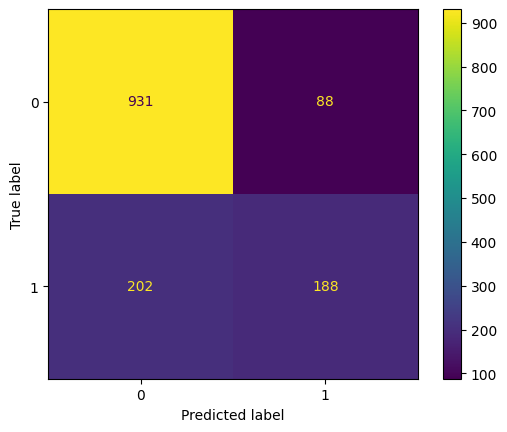

In [56]:
# create the confusion matrix
cm5 = confusion_matrix(y_test, y_pred_rf2)

ConfusionMatrixDisplay(confusion_matrix=cm5).plot();

In [57]:
rf_tuning_accuracy = accuracy_score(y_test, y_pred_rf2)
rf_tuning_precision = precision_score(y_test, y_pred_rf2)
rf_tuning_recall = recall_score(y_test, y_pred_rf2)
rf_tuning_f1 = f1_score(y_test, y_pred_rf2)

print("RF_tuning_Accuracy:", rf_tuning_accuracy)
print("RF_tuning_Recall:", rf_tuning_recall)
print("RF_tuning_Precision:", rf_tuning_precision)
print("RF_tuning_f1:", rf_tuning_f1)

RF_tuning_Accuracy: 0.794180269694819
RF_tuning_Recall: 0.48205128205128206
RF_tuning_Precision: 0.6811594202898551
RF_tuning_f1: 0.5645645645645646


### Hyperparameter Tuning for XG Boost

In [58]:
xgb_param_grid = {
    "colsample_bytree": [0.3, 0.5, 0.7, 0.8],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4,  0.5],
    'learning_rate': [0.01, 0.1, 0.2, 0.3], # default 0.1
    "max_depth": [2, 3, 4, 5, 6], # default 3
    "n_estimators": [100, 200, 300, 400], # default 100
    'max_depth': [3, 6, 9, 12],
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
}


In [59]:
start_time = time.time()
xgb_rand_search = RandomizedSearchCV(xgb, 
                                    param_distributions = xgb_param_grid,
                                    cv=5,
                                    scoring='f1',
                                    verbose=2,
                                    n_jobs=-1) #XGBClassifier()

xgb_rand_search.fit(X_train, y_train)
print("Best estimator:", xgb_rand_search.best_estimator_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time (seconds): 10.173002004623413


In [60]:
# use X_test to predict
y_pred_xgb = xgb_rand_search.predict(X_test)

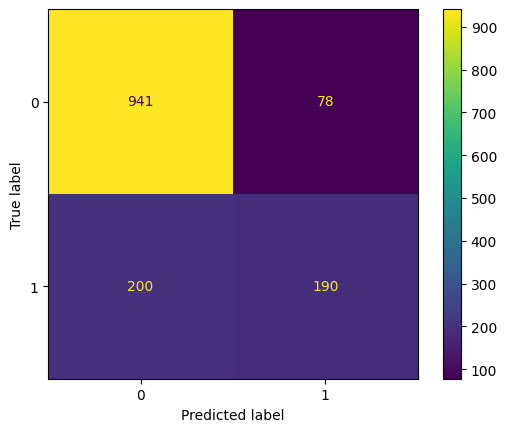

In [61]:
# create the confusion matrix
cm6 = confusion_matrix(y_test, y_pred_xgb)

ConfusionMatrixDisplay(confusion_matrix=cm6).plot();

In [62]:
xgb_tuning_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_tuning_precision = precision_score(y_test, y_pred_xgb)
xgb_tuning_recall = recall_score(y_test, y_pred_xgb)
xgb_tuning_f1 = f1_score(y_test, y_pred_xgb)

print("xgb_Accuracy:", xgb_tuning_accuracy)
print("xgb_Recall:", xgb_tuning_recall)
print("xgb_Precision:", xgb_tuning_precision)
print("xgb_f1:", xgb_tuning_f1)

xgb_Accuracy: 0.8026969481902059
xgb_Recall: 0.48717948717948717
xgb_Precision: 0.7089552238805971
xgb_f1: 0.5775075987841946


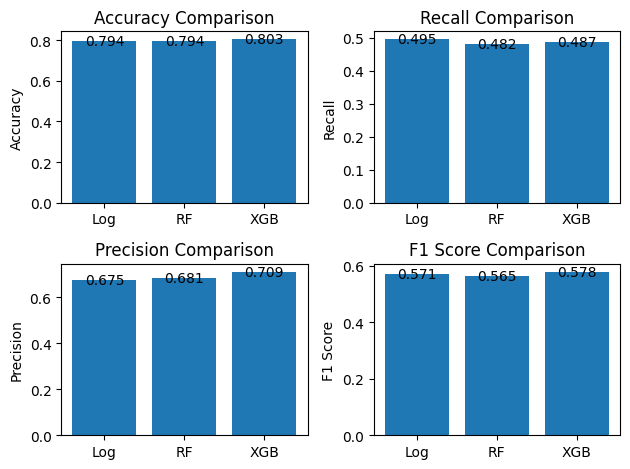

In [63]:
# plot accuracy, recall, precision and f1 comoarisons
models = ['Log', 'RF', 'XGB']
accuracy = [log_tuning_accuracy, rf_tuning_accuracy, xgb_tuning_accuracy]
recall = [log_tuning_recall, rf_tuning_recall, xgb_tuning_recall]
precision = [log_tuning_precision, rf_tuning_precision, xgb_tuning_precision]
f1 = [log_tuning_f1, rf_tuning_f1, xgb_tuning_f1]

#plt.figure(figsize=(10, 6))

# subplot for accuracy, recall, precision, f1
plt.subplot(2, 2, 1)
bars = plt.bar(models, accuracy)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 2)
bars = plt.bar(models, recall)
plt.title('Recall Comparison')
plt.ylabel('Recall')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 3)
bars = plt.bar(models, precision)
plt.title('Precision Comparison')
plt.ylabel('Precision')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.subplot(2, 2, 4)
bars = plt.bar(models, f1)
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='center')

plt.tight_layout()
plt.show()

### 4. Model Comparison

Performance matrix before tuning. 
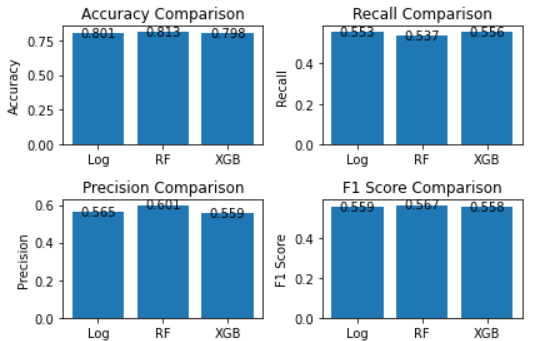      

Performance matrix after tuning.
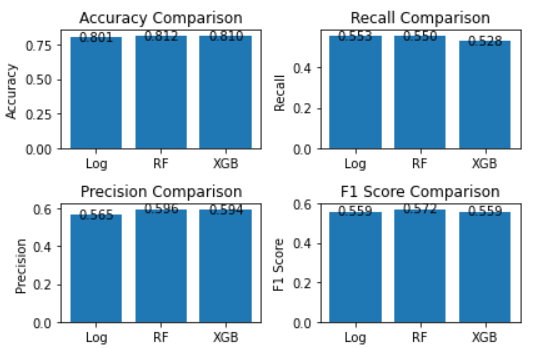

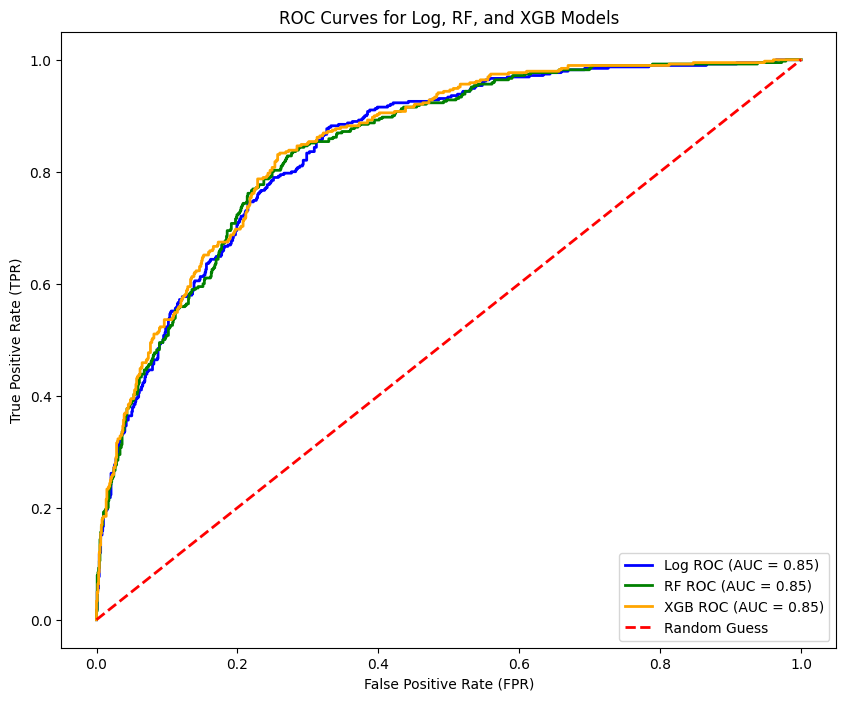

In [64]:
# logistic regression (Log ROC)
y_prob_log = tuned_log.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# rf(RF ROC)
y_prob_rf = rf_rand_search.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# xgb (XGB ROC)
y_prob_xgb = xgb_rand_search.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# ROC curves
plt.figure(figsize=(10, 8))

plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Log ROC (AUC = %0.2f)' % roc_auc_log)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='RF ROC (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label='XGB ROC (AUC = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Log, RF, and XGB Models')
plt.legend(loc='lower right')
plt.show()

ROC curve before tuning. 

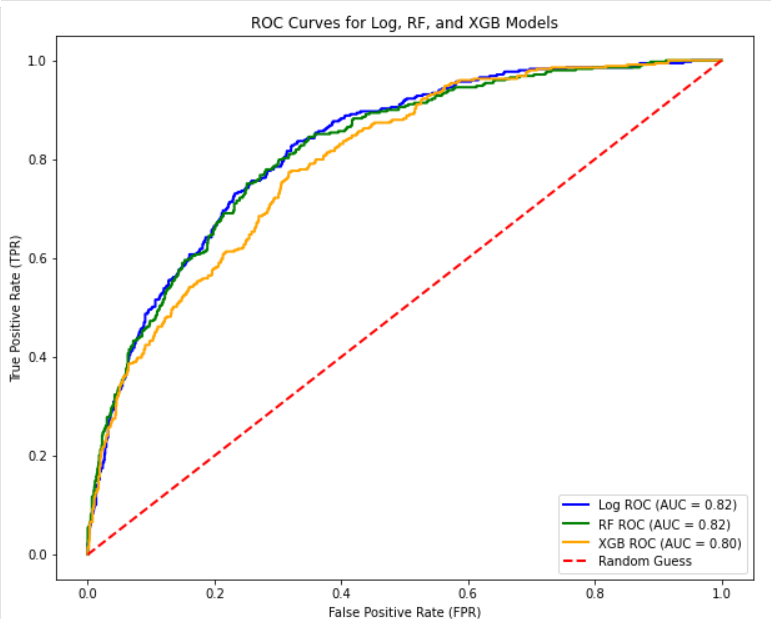